# Laboratorio #8 - Missing Data and Feature Engineering

El laboratorio deberá de ser entregado por medio de MiU a más tardar el Domingo, 15 de
Noviembre a las 11:59pm. No estaremos aceptando entregas tarde ni por correo electrónico. La
entrega será el link al documento en GitHub, en formato markdown o PDF, estén trabajando en
R o en Python.

### Parte 1: (70%)
La tabla “titanic_MD.csv” contiene missing values en varias columnas. Utilizando R o Python,
realice lo siguiente:


1\. Reporte detallado de missing data para todas las columnas. (5%)

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

titanicData = pd.read_csv("titanic_MD.csv")

Antes de un análisis detallado de cada variable es preciso comprender el dataset

In [2]:
print('Forma del dataset:', titanicData.shape)

Forma del dataset: (183, 12)


El dataset cuenta con 12 variables y 183 registros

In [3]:
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",?,38.0,1.0,0.0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S


El dataset cuenta con 7 variables numéricas

In [4]:
titanicData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,158.000000,180.000000,171.000000,175.000000
mean,455.366120,0.672131,1.191257,35.692532,0.461111,0.461988,78.959191
std,247.052476,0.470725,0.515187,15.640858,0.646122,0.753435,77.026328
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,35.500000,0.000000,0.000000,56.929200
75%,676.000000,1.000000,1.000000,48.000000,1.000000,1.000000,90.539600
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


Para determinar resultados esperados en los valores de los datos podemos verificar el tipo de variable que estos conforman

In [5]:
titanicData.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Primero se puede pasar un análisis superficial para determinar datos faltantes (vacíos)

<AxesSubplot:>

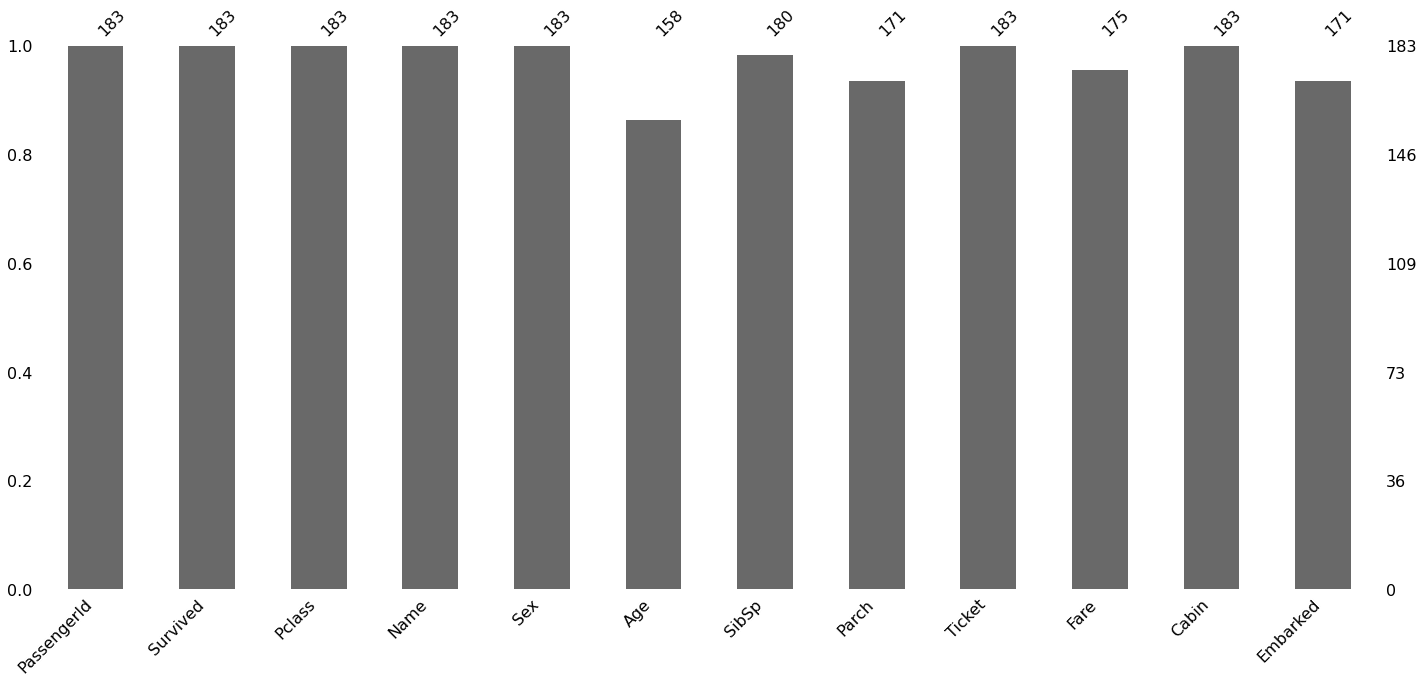

In [6]:
msno.bar(titanicData)

<AxesSubplot:>

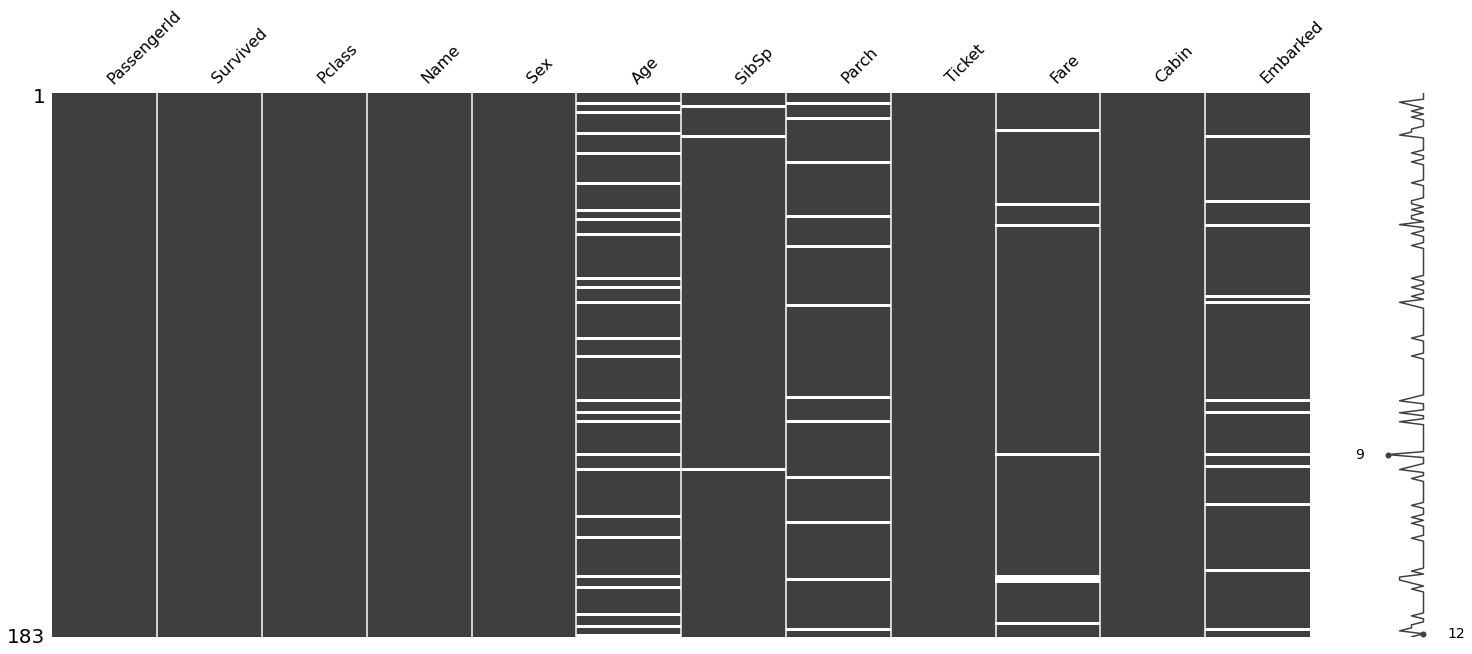

In [7]:
msno.matrix(titanicData)

In [8]:
titanicData.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

En este análisis podemos observar que las variables "Age", "SibSp", "Parch", "Fare" y "Embarked" tienen datos faltantes (vacíos)

In [9]:
np.unique(titanicData['PassengerId'])

array([  2,   4,   7,  11,  12,  22,  24,  28,  53,  55,  63,  67,  76,
        89,  93,  97,  98, 103, 111, 119, 124, 125, 137, 138, 140, 149,
       152, 171, 175, 178, 184, 194, 195, 196, 206, 210, 216, 219, 225,
       231, 246, 249, 252, 253, 258, 263, 264, 269, 270, 274, 276, 292,
       293, 298, 300, 306, 308, 310, 311, 312, 319, 320, 326, 328, 330,
       332, 333, 337, 338, 340, 341, 342, 346, 357, 367, 370, 371, 378,
       391, 394, 395, 413, 430, 431, 435, 436, 439, 446, 450, 453, 454,
       457, 461, 463, 474, 485, 487, 488, 493, 497, 499, 505, 506, 513,
       516, 517, 521, 524, 537, 540, 541, 545, 551, 557, 559, 572, 573,
       578, 582, 584, 586, 588, 592, 600, 610, 619, 622, 626, 628, 631,
       633, 642, 646, 648, 660, 663, 672, 680, 682, 690, 691, 699, 700,
       701, 702, 708, 711, 713, 716, 717, 718, 725, 731, 738, 742, 743,
       746, 749, 752, 760, 764, 766, 773, 780, 782, 783, 790, 797, 803,
       807, 810, 821, 824, 836, 854, 858, 863, 868, 872, 873, 88

La variable "PassengerId" no cuenta con datos faltantes ya que no presenta irregularidades en valores ni tiene valores vacíos

In [10]:
np.unique(titanicData['Survived'])

array([0, 1], dtype=int64)

La variable "Survived" no cuenta con datos faltantes ya que no presenta irregularidades en valores ni tiene valores vacíos

In [11]:
np.unique(titanicData['Pclass'])

array([1, 2, 3], dtype=int64)

La variable "Pclass" no cuenta con datos faltantes ya que no presenta irregularidades en valores ni tiene valores vacíos

In [12]:
np.unique(titanicData['Name'])

array(['Allen, Miss. Elisabeth Walton', 'Allison, Master. Hudson Trevor',
       'Allison, Miss. Helen Loraine',
       'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
       'Anderson, Mr. Harry', 'Andrews, Miss. Kornelia Theodosia',
       'Andrews, Mr. Thomas Jr',
       'Appleton, Mrs. Edward Dale (Charlotte Lamson)',
       'Astor, Mrs. John Jacob (Madeleine Talmadge Force)',
       'Aubart, Mme. Leontine Pauline', 'Ball, Mrs. (Ada E Hall)',
       'Barkworth, Mr. Algernon Henry Wilson', 'Baxter, Mr. Quigg Edmond',
       'Baxter, Mrs. James (Helene DeLaudeniere Chaput)',
       'Bazzani, Miss. Albina', 'Becker, Master. Richard F',
       'Becker, Miss. Marion Louise', 'Beckwith, Mr. Richard Leonard',
       'Beckwith, Mrs. Richard Leonard (Sallie Monypeny)',
       'Beesley, Mr. Lawrence', 'Behr, Mr. Karl Howell',
       'Bishop, Mr. Dickinson H',
       'Bishop, Mrs. Dickinson H (Helen Walton)',
       'Bissette, Miss. Amelia',
       'Bjornstrom-Steffansson, Mr. Mauritz Haka

La variable "Name" no cuenta con datos faltantes ya que no presenta irregularidades en valores ni tiene valores vacíos

In [13]:
np.unique(titanicData['Sex'])

array(['?', 'female', 'male'], dtype=object)

La variable "Sex" no cuenta con datos faltantes vacíos pero sí presenta datos atípicos "?" los cuales deben contarse como datos faltantes

In [14]:
titanicData.replace(r'\?', np.nan, regex = True, inplace = True)
titanicData.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

Al reemplazar los "?" concluímos que hay varios valores faltantes en la variable "Sex"

In [15]:
np.unique(titanicData['Age'])

array([ 0.92,  2.  ,  3.  ,  4.  ,  6.  , 11.  , 14.  , 15.  , 16.  ,
       17.  , 18.  , 19.  , 21.  , 22.  , 23.  , 24.  , 25.  , 27.  ,
       28.  , 29.  , 30.  , 31.  , 32.  , 33.  , 34.  , 35.  , 36.  ,
       36.5 , 37.  , 38.  , 39.  , 40.  , 41.  , 42.  , 43.  , 44.  ,
       45.  , 46.  , 47.  , 48.  , 49.  , 50.  , 51.  , 52.  , 53.  ,
       54.  , 55.  , 56.  , 58.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 70.  , 71.  , 80.  ,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan])

La variable "Age" cuenta con datos faltantes vacíos. Asimismo hay datos que a pesar de ser numéricos no representan una edad como tal, por lo que deben ser tomados como data faltante

In [16]:
titanicData['Age'].replace(0.92, 92, inplace = True)
titanicData['Age'].replace(36.5, 36, inplace = True)
titanicData.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

Al reemplazar los datos atípicos concluímos que hay no más valores faltantes en la variable "Age"

In [17]:
np.unique(titanicData['SibSp'])

array([ 0.,  1.,  2.,  3., nan, nan, nan])

La variable "SibSp" cuenta con datos faltantes vacíos

In [18]:
np.unique(titanicData['Parch'])

array([ 0.,  1.,  2.,  4., nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan])

La variable "Parch" cuenta con datos faltantes vacíos

In [19]:
np.unique(titanicData['Ticket'])

array(['110152', '110413', '110465', '110564', '110813', '111240',
       '111320', '111361', '111369', '112050', '112053', '112059',
       '112277', '113043', '113050', '113051', '113055', '113501',
       '113503', '113505', '113509', '113514', '113760', '113773',
       '113776', '113781', '113783', '113784', '113786', '113787',
       '113788', '113803', '113806', '11751', '11752', '11753', '11755',
       '11765', '11767', '11769', '11771', '11813', '11967', '12749',
       '13049', '13213', '13214', '13502', '13507', '13509', '13567',
       '13568', '16966', '17421', '17453', '17463', '17465', '17466',
       '17474', '17764', '19877', '19928', '19943', '19950', '19952',
       '19996', '230080', '230136', '24160', '248698', '248733', '27042',
       '27267', '28551', '33638', '34218', '347054', '348121', '348123',
       '348124', '35273', '35281', '36928', '36947', '36963', '36967',
       '36973', '392096', '5727', '695', 'C.A. 29395', 'C.A. 34260',
       'F.C. 12750', 'PC 

La variable "Ticket" no cuenta con datos faltantes vacíos. Presenta datos atípicos de diferentes longitudes del estándar de ticket pero se considerará como parte de la naturaleza de los datos

In [20]:
np.unique(titanicData['Fare'])

array([  0.    ,   5.    ,   7.65  ,   8.05  ,  10.4625,  10.5   ,
        12.475 ,  12.875 ,  13.    ,  13.7917,  16.7   ,  25.5875,
        25.9292,  26.    ,  26.2833,  26.2875,  26.3875,  26.55  ,
        27.7208,  27.75  ,  28.5   ,  28.7125,  29.7   ,  30.    ,
        30.5   ,  30.6958,  31.    ,  32.3208,  33.5   ,  34.0208,
        34.6542,  35.5   ,  38.5   ,  39.    ,  39.4   ,  39.6   ,
        40.125 ,  49.5   ,  49.5042,  50.4958,  51.4792,  51.8625,
        52.    ,  52.5542,  53.1   ,  55.    ,  55.4417,  55.9   ,
        56.9292,  57.    ,  57.9792,  61.175 ,  61.9792,  63.3583,
        66.6   ,  69.3   ,  71.    ,  71.2833,  75.25  ,  76.7292,
        77.2875,  77.9583,  78.2667,  78.85  ,  79.2   ,  79.65  ,
        81.8583,  83.1583,  83.475 ,  86.5   ,  89.1042,  90.    ,
        91.0792,  93.5   , 106.425 , 108.9   , 110.8833, 113.275 ,
       120.    , 134.5   , 135.6333, 146.5208, 151.55  , 153.4625,
       164.8667, 211.3375, 211.5   , 227.525 , 247.5208, 262.3

La variable "Fare" cuenta con datos faltantes vacíos. La irregularidad en longitud de los valores en los datos no es considerada como indicador de dato atípico por la naturaleza de la variable, siendo esta una tarifa (puede ser un número entero o entero con decimales); sin embargo, si esta variable presenta un valor "0" se tomará como dato faltante

In [21]:
titanicData['Fare']=titanicData['Fare'].apply(lambda x : np.nan if (x==0) else x)
np.unique(titanicData['Fare'])

array([  5.    ,   7.65  ,   8.05  ,  10.4625,  10.5   ,  12.475 ,
        12.875 ,  13.    ,  13.7917,  16.7   ,  25.5875,  25.9292,
        26.    ,  26.2833,  26.2875,  26.3875,  26.55  ,  27.7208,
        27.75  ,  28.5   ,  28.7125,  29.7   ,  30.    ,  30.5   ,
        30.6958,  31.    ,  32.3208,  33.5   ,  34.0208,  34.6542,
        35.5   ,  38.5   ,  39.    ,  39.4   ,  39.6   ,  40.125 ,
        49.5   ,  49.5042,  50.4958,  51.4792,  51.8625,  52.    ,
        52.5542,  53.1   ,  55.    ,  55.4417,  55.9   ,  56.9292,
        57.    ,  57.9792,  61.175 ,  61.9792,  63.3583,  66.6   ,
        69.3   ,  71.    ,  71.2833,  75.25  ,  76.7292,  77.2875,
        77.9583,  78.2667,  78.85  ,  79.2   ,  79.65  ,  81.8583,
        83.1583,  83.475 ,  86.5   ,  89.1042,  90.    ,  91.0792,
        93.5   , 106.425 , 108.9   , 110.8833, 113.275 , 120.    ,
       134.5   , 135.6333, 146.5208, 151.55  , 153.4625, 164.8667,
       211.3375, 211.5   , 227.525 , 247.5208, 262.375 , 263. 

In [22]:
np.unique(titanicData['Cabin'])

array(['A10', 'A16', 'A20', 'A23', 'A24', 'A26', 'A31', 'A34', 'A36',
       'A5', 'A6', 'A7', 'B101', 'B18', 'B19', 'B20', 'B22', 'B3', 'B30',
       'B35', 'B37', 'B38', 'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50',
       'B51 B53 B55', 'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73',
       'B77', 'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101',
       'C103', 'C104', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30', 'C32',
       'C45', 'C46', 'C49', 'C50', 'C52', 'C54', 'C62 C64', 'C65', 'C68',
       'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86', 'C87', 'C90',
       'C91', 'C92', 'C93', 'C99', 'D', 'D10 D12', 'D11', 'D15', 'D17',
       'D19', 'D20', 'D26', 'D28', 'D30', 'D33', 'D35', 'D36', 'D37',
       'D46', 'D47', 'D48', 'D49', 'D50', 'D56', 'D6', 'D7', 'D9', 'E10',
       'E101', 'E12', 'E121', 'E17', 'E24', 'E25', 'E31', 'E33', 'E34',
       'E36', 'E38', 'E40', 'E44', 'E46', 'E49', 'E50', 'E58', 'E

La variable "Cabin" no cuenta con datos faltantes vacíos. Presenta irregularidades en valores ya que la convención (Letra seguida de números o solo letra) no es única en todos los registros; sin embargo, se tomarán en cuenta todos los datos observados después de dejarlos lo más limpio posible. Los registros que cuentan con "múltiples valores" serán tomados como nulos

In [23]:
titanicData['Cabin']=titanicData['Cabin'].apply(lambda x : x if(len(str(x))<5) else np.nan)
titanicData['Cabin']

0       C85
1      C123
2       E46
3        G6
4      C103
       ... 
178     D35
179     NaN
180     C50
181     B42
182    C148
Name: Cabin, Length: 183, dtype: object

In [24]:
tempEmbarkedCol=titanicData['Embarked'].fillna("nan")
np.unique(tempEmbarkedCol)

array(['C', 'Q', 'S', 'nan'], dtype=object)

La variable "Embarked" cuenta con datos faltantes vacíos

En resumen, las columnas que cuentan con datos faltantes son:
* Sex
* Age
* SibSp
* Parch
* Fare
* Cabin
* Embarked

<AxesSubplot:>

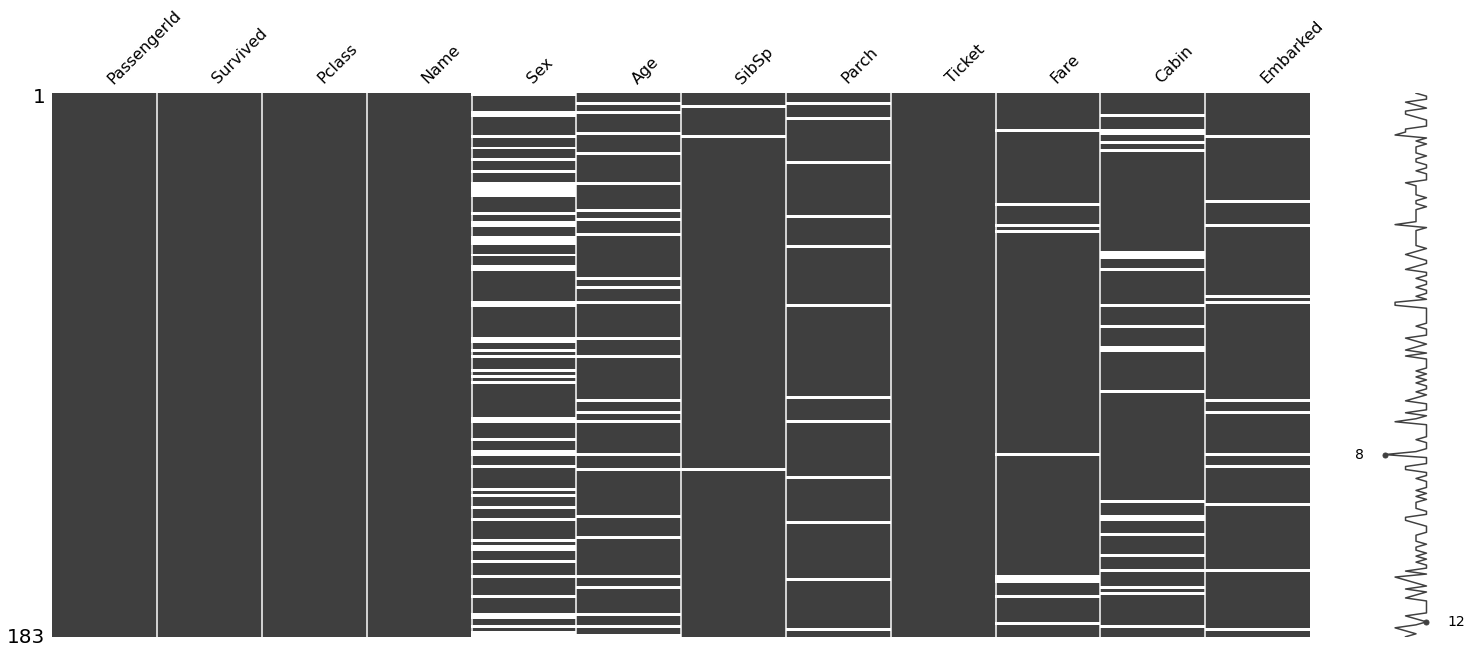

In [25]:
msno.matrix(titanicData)

2\. Para cada columna especificar que tipo de modelo se utilizará y qué valores se le darán
a todos los missing values. (Ej. Imputación sectorizada por la moda, bins, y cualquier
otro método visto anteriormente). (10%)

In [26]:
titanicData.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,-0.068930,-0.088806,-0.062083,0.026744
Survived,0.148495,1.000000,-0.034542,-0.225250,0.113987,-0.003365,0.104286
Pclass,-0.089136,-0.034542,1.000000,-0.302850,-0.102294,0.041969,-0.310906
Age,-0.068930,-0.225250,-0.302850,1.000000,-0.054457,-0.196165,-0.092257
SibSp,-0.088806,0.113987,-0.102294,-0.054457,1.000000,0.255152,0.293117
Parch,-0.062083,-0.003365,0.041969,-0.196165,0.255152,1.000000,0.376989
Fare,0.026744,0.104286,-0.310906,-0.092257,0.293117,0.376989,1.000000


<AxesSubplot:>

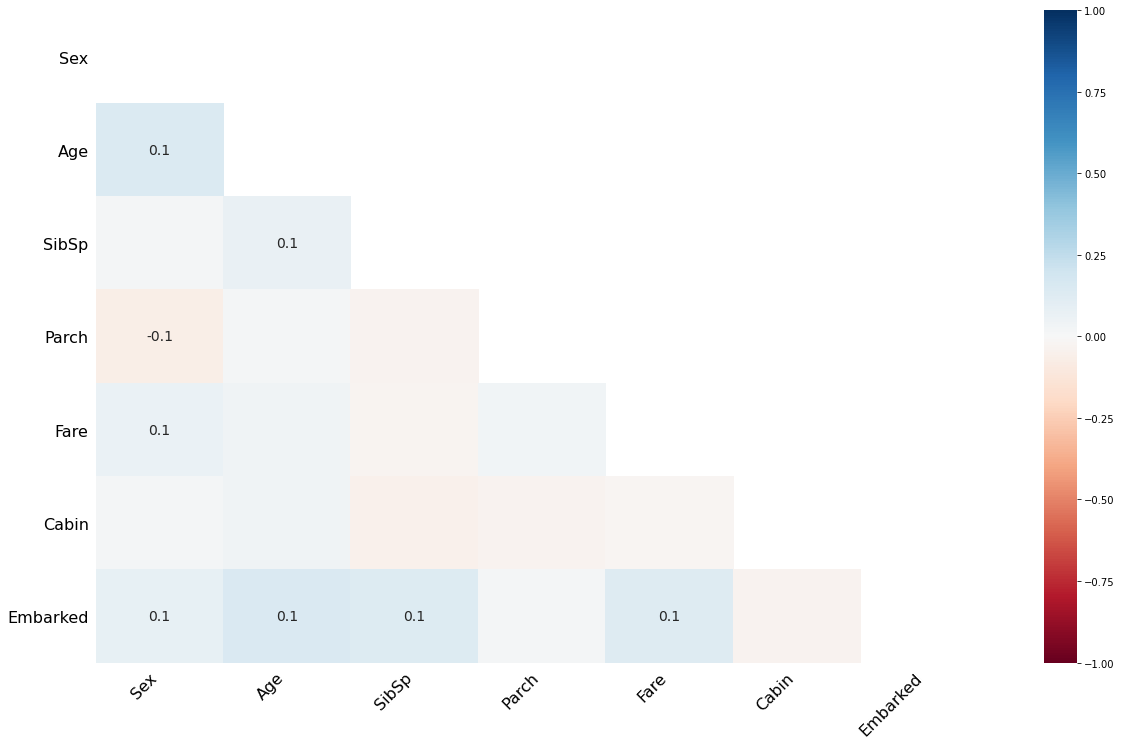

In [27]:
msno.heatmap(titanicData)

En general no consideraré el método de dropping values porque se pierde muchos datos

Para la columna **Sex**:

Al ser una variable categórica, se puede considerar (con sus ventajas y desventajas)
* Listwise deletion: fácil implementación pero se pierde datos
* Imputación por moda: se ingresa el valor más repetido pero los datos se vuelven muy sesgados
* Modelo predictivo (KNN, SVM, logistic regression): eligen la mejor aproximación del valor faltante en un momento determinado del tiempo; puede que necesite actualizarse

Considero que la mejor opción es un modelo predictivo de regresión logística

Para la columna **Age**:

Al ser una variable discreta, las mejores opciones para manejar missing values (con sus ventajas y desventajas) son:
* Listwise deletion: fácil implementación pero se pierde datos
* Imputación por media o mediana: mantiene el promedio o la mediana pero cambian las estadísticas
* Modelo predictivo (linear or multidimensional regression): eligen la mejor aproximación del valor faltante en un momento determinado del tiempo; puede que necesite actualizarse

Considero que la mejor opción es una regresión lineal o multidimensional

Para la columna **SibSp**:

Al ser una variable discreta, las mejores opciones para manejar missing values (con sus ventajas y desventajas) son:

* Listwise deletion: fácil implementación pero se pierde datos
* Pairwise deletion: hay buena correlación entre variables, utiliza todos los datos disponibles (no pierdo datos) pero las características tienen diferentes tamaños y significados
* Imputación por media: mantiene el promedio de cada característica
* Modelo predictivo (linear or multidimensional regression): eligen la mejor aproximación del valor faltante en un momento determinado del tiempo; puede que necesite actualizarse

Considero que la mejor opción es una imputación por media

Para la columna **Parch**:

Es una variable discreta a simple vista, pero en realidad se trata de una variable categórica. Las mejores opciones para manejar missing values (con sus ventajas y desventajas) son:

* Listwise deletion: fácil implementación pero se pierde datos
* Imputación por moda: se ingresa el valor más repetido pero los datos se vuelven muy sesgados
* Modelo predictivo (KNN, SVM, logistic regression): eligen la mejor aproximación del valor faltante en un momento determinado del tiempo; puede que necesite actualizarse

Considero que la mejor opción es una imputación por moda

Para la columna **Fare**:

Al ser una variable continua, las mejores opciones para manejar missing values (con sus ventajas y desventajas) son:

* Listwise deletion: fácil implementación pero se pierde datos
* Pairwise deletion: hay buena correlación entre variables, utiliza todos los datos disponibles (no pierdo datos) pero las características tienen diferentes tamaños y significados
* Imputación por media o mediana: mantiene el promedio o la mediana pero cambian las estadísticas
* Modelo predictivo (linear or multidimensional regression): eligen la mejor aproximación del valor faltante en un momento determinado del tiempo; puede que necesite actualizarse

Considero que la mejor opción es pairwise deletion

Para la columna **Cabin**:

Por la naturaleza de la variable, podría usarse (con sus respectivas ventajas y desventajas):

* Listwise deletion: fácil implementación pero se pierde datos
* Modelo predictivo (KNN, SVM, logistic regression): eligen la mejor aproximación del valor faltante en un momento determinado del tiempo; puede que necesite actualizarse

Considero que la mejor opción es un listwise deletion

Para la columna **Embarked**
Al ser una variable categórica, se puede considerar (con sus ventajas y desventajas)

* Listwise deletion: fácil implementación pero se pierde datos
* Imputación por moda: se ingresa el valor más repetido pero los datos se vuelven muy sesgados
* Modelo predictivo (KNN, SVM, logistic regression): eligen la mejor aproximación del valor faltante en un momento determinado del tiempo; puede que necesite actualizarse

Considero que la mejor opción es un modelo predictivo KNN

3\. Reporte de qué filas están completas (5%)


Las filas que están completas, basadas en evidencia presentada más arriba (inciso no. 1), son:
* PassengerId
* Survived
* Pclass
* Name
* Ticket

4\. Utilizar los siguientes métodos para cada columna que contiene missing values: (50%)


&nbsp; a. Pairwise deletion

Todas las operaciones en pandas como mean, sum, etc., omiten intrínsecamente los valores faltantes, por lo que no hay método manual para hacerlo

&nbsp; b. Imputación general (media, moda y mediana)

### Sex

No es posible usar imputación por media y mediana porque es una variable categórica

In [28]:
# moda
titanicData['Sex_moda'] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(titanicData[['Sex']])
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_moda
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female


### Age

In [29]:
# media
titanicData['Age_mean'] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(titanicData[['Age']])
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_moda,Age_mean
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.000000
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.000000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.000000
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,36.265823
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.000000


In [30]:
# mediana
titanicData['Age_median'] = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(titanicData[['Age']])
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_moda,Age_mean,Age_median
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.000000,38.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.000000,35.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.000000,54.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,36.265823,36.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.000000,58.0


In [31]:
# moda
titanicData['Age_moda'] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(titanicData[['Age']])
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_moda,Age_mean,Age_median,Age_moda
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.000000,38.0,38.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.000000,35.0,35.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.000000,54.0,54.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,36.265823,36.0,24.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.000000,58.0,58.0


### SibSp

No es posible usar imputación por media y mediana porque es una variable categórica

In [32]:
# moda
titanicData['SibSp_moda'] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(titanicData[['SibSp']])
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_moda,Age_mean,Age_median,Age_moda,SibSp_moda
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.000000,38.0,38.0,1.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.000000,35.0,35.0,1.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.000000,54.0,54.0,0.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,36.265823,36.0,24.0,1.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.000000,58.0,58.0,0.0


### Parch

No es posible usar imputación por media y mediana porque es una variable categórica

In [33]:
# moda
titanicData['Parch_moda'] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(titanicData[['Parch']])
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_moda,Age_mean,Age_median,Age_moda,SibSp_moda,Parch_moda
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.000000,38.0,38.0,1.0,0.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.000000,35.0,35.0,1.0,0.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.000000,54.0,54.0,0.0,0.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,36.265823,36.0,24.0,1.0,0.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.000000,58.0,58.0,0.0,0.0


### Fare

In [34]:
# media
titanicData['Fare_mean'] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(titanicData[['Fare']])
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_moda,Age_mean,Age_median,Age_moda,SibSp_moda,Parch_moda,Fare_mean
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.000000,38.0,38.0,1.0,0.0,71.2833
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.000000,35.0,35.0,1.0,0.0,53.1000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.000000,54.0,54.0,0.0,0.0,51.8625
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,36.265823,36.0,24.0,1.0,0.0,16.7000
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.000000,58.0,58.0,0.0,0.0,26.5500


In [35]:
# mediana
titanicData['Fare_median'] = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(titanicData[['Fare']])
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_moda,Age_mean,Age_median,Age_moda,SibSp_moda,Parch_moda,Fare_mean,Fare_median
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.000000,38.0,38.0,1.0,0.0,71.2833,71.2833
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.000000,35.0,35.0,1.0,0.0,53.1000,53.1000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.000000,54.0,54.0,0.0,0.0,51.8625,51.8625
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,36.265823,36.0,24.0,1.0,0.0,16.7000,16.7000
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.000000,58.0,58.0,0.0,0.0,26.5500,26.5500


In [36]:
# moda
titanicData['Fare_moda'] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(titanicData[['Fare']])
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Sex_moda,Age_mean,Age_median,Age_moda,SibSp_moda,Parch_moda,Fare_mean,Fare_median,Fare_moda
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,C,male,38.000000,38.0,38.0,1.0,0.0,71.2833,71.2833,71.2833
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,S,female,35.000000,35.0,35.0,1.0,0.0,53.1000,53.1000,53.1000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,S,male,54.000000,54.0,54.0,0.0,0.0,51.8625,51.8625,51.8625
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,S,female,36.265823,36.0,24.0,1.0,0.0,16.7000,16.7000,16.7000
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,S,female,58.000000,58.0,58.0,0.0,0.0,26.5500,26.5500,26.5500


### Cabin

No es posible usar imputación por media y mediana porque es una variable categórica

In [37]:
# moda
titanicData['Cabin_moda'] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(titanicData[['Cabin']])
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_moda,Age_mean,Age_median,Age_moda,SibSp_moda,Parch_moda,Fare_mean,Fare_median,Fare_moda,Cabin_moda
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,male,38.000000,38.0,38.0,1.0,0.0,71.2833,71.2833,71.2833,C85
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,female,35.000000,35.0,35.0,1.0,0.0,53.1000,53.1000,53.1000,C123
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,male,54.000000,54.0,54.0,0.0,0.0,51.8625,51.8625,51.8625,E46
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,female,36.265823,36.0,24.0,1.0,0.0,16.7000,16.7000,16.7000,G6
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,female,58.000000,58.0,58.0,0.0,0.0,26.5500,26.5500,26.5500,C103


### Embarked

No es posible usar imputación por media y mediana porque es una variable categórica

In [38]:
# moda
titanicData['Embarked_moda'] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(titanicData[['Embarked']])
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_mean,Age_median,Age_moda,SibSp_moda,Parch_moda,Fare_mean,Fare_median,Fare_moda,Cabin_moda,Embarked_moda
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,38.000000,38.0,38.0,1.0,0.0,71.2833,71.2833,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,35.000000,35.0,35.0,1.0,0.0,53.1000,53.1000,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,54.000000,54.0,54.0,0.0,0.0,51.8625,51.8625,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,36.265823,36.0,24.0,1.0,0.0,16.7000,16.7000,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,58.000000,58.0,58.0,0.0,0.0,26.5500,26.5500,26.5500,C103,S


&nbsp; c. Imputación sectorizada

### Sex

In [39]:
titanicData['Sex_sector'] = pd.cut(
    titanicData['Survived'],
    bins=2,
    labels=['male', 'female']
)
titanicData.drop(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Fare'], axis=1).head()

,Name,Sex,Age,Parch,Ticket,Cabin,Embarked,Sex_moda,Age_mean,Age_median,Age_moda,SibSp_moda,Parch_moda,Fare_mean,Fare_median,Fare_moda,Cabin_moda,Embarked_moda,Sex_sector
0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,0.0,PC 17599,C85,C,male,38.000000,38.0,38.0,1.0,0.0,71.2833,71.2833,71.2833,C85,C,female
1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0.0,113803,C123,S,female,35.000000,35.0,35.0,1.0,0.0,53.1000,53.1000,53.1000,C123,S,female
2,"McCarthy, Mr. Timothy J",male,54.0,0.0,17463,E46,S,male,54.000000,54.0,54.0,0.0,0.0,51.8625,51.8625,51.8625,E46,S,male
3,"Sandstrom, Miss. Marguerite Rut",female,NaN,NaN,PP 9549,G6,S,female,36.265823,36.0,24.0,1.0,0.0,16.7000,16.7000,16.7000,G6,S,female
4,"Bonnell, Miss. Elizabeth",female,58.0,0.0,113783,C103,S,female,58.000000,58.0,58.0,0.0,0.0,26.5500,26.5500,26.5500,C103,S,female


### Age

In [40]:
titanicData['Age_sector'] = SimpleImputer(missing_values=np.nan, strategy='constant').fit_transform(titanicData[['Age']])
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_moda,SibSp_moda,Parch_moda,Fare_mean,Fare_median,Fare_moda,Cabin_moda,Embarked_moda,Sex_sector,Age_sector
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,38.0,1.0,0.0,71.2833,71.2833,71.2833,C85,C,female,38.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,35.0,1.0,0.0,53.1000,53.1000,53.1000,C123,S,female,35.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,54.0,0.0,0.0,51.8625,51.8625,51.8625,E46,S,male,54.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,24.0,1.0,0.0,16.7000,16.7000,16.7000,G6,S,female,0.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,58.0,0.0,0.0,26.5500,26.5500,26.5500,C103,S,female,58.0


### SibSp

In [41]:
titanicData['SibSp_sector'] = pd.cut(
    titanicData['Survived'],
    bins=4,
    labels=[0, 1, 2, 3]
)
titanicData.drop(['PassengerId', 'Survived', 'Pclass', 'Name', 'Fare'], axis=1).head()

,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Sex_moda,Age_mean,Age_median,...,SibSp_moda,Parch_moda,Fare_mean,Fare_median,Fare_moda,Cabin_moda,Embarked_moda,Sex_sector,Age_sector,SibSp_sector
0,NaN,38.0,1.0,0.0,PC 17599,C85,C,male,38.000000,38.0,...,1.0,0.0,71.2833,71.2833,71.2833,C85,C,female,38.0,3
1,female,35.0,1.0,0.0,113803,C123,S,female,35.000000,35.0,...,1.0,0.0,53.1000,53.1000,53.1000,C123,S,female,35.0,3
2,male,54.0,0.0,0.0,17463,E46,S,male,54.000000,54.0,...,0.0,0.0,51.8625,51.8625,51.8625,E46,S,male,54.0,0
3,female,NaN,1.0,NaN,PP 9549,G6,S,female,36.265823,36.0,...,1.0,0.0,16.7000,16.7000,16.7000,G6,S,female,0.0,3
4,female,58.0,NaN,0.0,113783,C103,S,female,58.000000,58.0,...,0.0,0.0,26.5500,26.5500,26.5500,C103,S,female,58.0,3


### Parch

In [42]:
titanicData['Parch_sector'] = pd.cut(
    titanicData['Fare'],
    bins=4,
    labels=[0, 1, 2, 4]
)
titanicData.drop(['PassengerId', 'Survived', 'Pclass', 'Name', 'Fare'], axis=1).head()

,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Sex_moda,Age_mean,Age_median,...,Parch_moda,Fare_mean,Fare_median,Fare_moda,Cabin_moda,Embarked_moda,Sex_sector,Age_sector,SibSp_sector,Parch_sector
0,NaN,38.0,1.0,0.0,PC 17599,C85,C,male,38.000000,38.0,...,0.0,71.2833,71.2833,71.2833,C85,C,female,38.0,3,0
1,female,35.0,1.0,0.0,113803,C123,S,female,35.000000,35.0,...,0.0,53.1000,53.1000,53.1000,C123,S,female,35.0,3,0
2,male,54.0,0.0,0.0,17463,E46,S,male,54.000000,54.0,...,0.0,51.8625,51.8625,51.8625,E46,S,male,54.0,0,0
3,female,NaN,1.0,NaN,PP 9549,G6,S,female,36.265823,36.0,...,0.0,16.7000,16.7000,16.7000,G6,S,female,0.0,3,0
4,female,58.0,NaN,0.0,113783,C103,S,female,58.000000,58.0,...,0.0,26.5500,26.5500,26.5500,C103,S,female,58.0,3,0


### Fare

In [43]:
titanicData['Fare_sector'] = SimpleImputer(missing_values=np.nan, strategy='constant').fit_transform(titanicData[['Fare']])
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_mean,Fare_median,Fare_moda,Cabin_moda,Embarked_moda,Sex_sector,Age_sector,SibSp_sector,Parch_sector,Fare_sector
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,71.2833,71.2833,71.2833,C85,C,female,38.0,3,0,71.2833
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,53.1000,53.1000,53.1000,C123,S,female,35.0,3,0,53.1000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,51.8625,51.8625,51.8625,E46,S,male,54.0,0,0,51.8625
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,16.7000,16.7000,16.7000,G6,S,female,0.0,3,0,16.7000
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,26.5500,26.5500,26.5500,C103,S,female,58.0,3,0,26.5500


### Cabin

In [44]:
titanicData['Cabin_sector'] = pd.cut(
    titanicData['Fare'],
    bins=8,
    labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
)
titanicData.drop(['PassengerId', 'Survived', 'Pclass', 'Name', 'Fare'], axis=1).head()

,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Sex_moda,Age_mean,Age_median,...,Fare_median,Fare_moda,Cabin_moda,Embarked_moda,Sex_sector,Age_sector,SibSp_sector,Parch_sector,Fare_sector,Cabin_sector
0,NaN,38.0,1.0,0.0,PC 17599,C85,C,male,38.000000,38.0,...,71.2833,71.2833,C85,C,female,38.0,3,0,71.2833,B
1,female,35.0,1.0,0.0,113803,C123,S,female,35.000000,35.0,...,53.1000,53.1000,C123,S,female,35.0,3,0,53.1000,A
2,male,54.0,0.0,0.0,17463,E46,S,male,54.000000,54.0,...,51.8625,51.8625,E46,S,male,54.0,0,0,51.8625,A
3,female,NaN,1.0,NaN,PP 9549,G6,S,female,36.265823,36.0,...,16.7000,16.7000,G6,S,female,0.0,3,0,16.7000,A
4,female,58.0,NaN,0.0,113783,C103,S,female,58.000000,58.0,...,26.5500,26.5500,C103,S,female,58.0,3,0,26.5500,A


### Embarked

In [45]:
titanicData['Embarked_sector'] = pd.cut(
    titanicData['Survived'],
    bins=3,
    labels=['C', 'Q', 'S']
)
titanicData.drop(['PassengerId', 'Survived', 'Pclass', 'Name', 'Cabin'], axis=1).head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_moda,Age_mean,Age_median,...,Fare_moda,Cabin_moda,Embarked_moda,Sex_sector,Age_sector,SibSp_sector,Parch_sector,Fare_sector,Cabin_sector,Embarked_sector
0,NaN,38.0,1.0,0.0,PC 17599,71.2833,C,male,38.000000,38.0,...,71.2833,C85,C,female,38.0,3,0,71.2833,B,S
1,female,35.0,1.0,0.0,113803,53.1000,S,female,35.000000,35.0,...,53.1000,C123,S,female,35.0,3,0,53.1000,A,S
2,male,54.0,0.0,0.0,17463,51.8625,S,male,54.000000,54.0,...,51.8625,E46,S,male,54.0,0,0,51.8625,A,C
3,female,NaN,1.0,NaN,PP 9549,16.7000,S,female,36.265823,36.0,...,16.7000,G6,S,female,0.0,3,0,16.7000,A,S
4,female,58.0,NaN,0.0,113783,26.5500,S,female,58.000000,58.0,...,26.5500,C103,S,female,58.0,3,0,26.5500,A,S


&nbsp; d. Modelo de regresión lineal simple

Por teoría no es posible hacer regresión lineal simple con las variables categóricas **Sex**, **SibSp**, **Cabin**, **Embarked**, **Parch**

In [46]:
X = titanicData
r = X.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Pclass', 'Embarked', 'Parch', 'PassengerId'], axis=1).replace(np.nan, 0)

lm = LinearRegression()

### Age

In [47]:
lm = lm.fit(r[['Fare']], r['Age'])
r['age_lm'] = lm.predict(r[['Age']])
X['age_LM'] = np.where(X['Age']>0, X['Age'], np.where(r['age_lm']>0, round(r['age_lm'],0), 1))

np.unique(X['age_LM'])

array([ 2.,  3.,  4.,  6., 11., 14., 15., 16., 17., 18., 19., 21., 22.,
       23., 24., 25., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36.,
       37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.,
       50., 51., 52., 53., 54., 55., 56., 58., 60., 61., 62., 63., 64.,
       65., 70., 71., 80., 92.])

In [48]:
X.drop(['PassengerId', 'Name', 'Parch'], axis=1).head()

,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked,Sex_moda,...,Cabin_moda,Embarked_moda,Sex_sector,Age_sector,SibSp_sector,Parch_sector,Fare_sector,Cabin_sector,Embarked_sector,age_LM
0,1,1,NaN,38.0,1.0,PC 17599,71.2833,C85,C,male,...,C85,C,female,38.0,3,0,71.2833,B,S,38.0
1,1,1,female,35.0,1.0,113803,53.1000,C123,S,female,...,C123,S,female,35.0,3,0,53.1000,A,S,35.0
2,0,1,male,54.0,0.0,17463,51.8625,E46,S,male,...,E46,S,male,54.0,0,0,51.8625,A,C,54.0
3,1,3,female,NaN,1.0,PP 9549,16.7000,G6,S,female,...,G6,S,female,0.0,3,0,16.7000,A,S,31.0
4,1,1,female,58.0,NaN,113783,26.5500,C103,S,female,...,C103,S,female,58.0,3,0,26.5500,A,S,58.0


### Fare

In [49]:
lm = lm.fit(r[['Age']], r['Fare'])
r['fare_lm'] = lm.predict(r[['Fare']])
X['fare_LM'] = np.where(X['Fare']>0, X['Fare'], np.where(r['fare_lm']>0, round(r['fare_lm'],0), 1))

np.unique(X['fare_LM'])

array([  5.    ,   7.65  ,   8.05  ,  10.4625,  10.5   ,  12.475 ,
        12.875 ,  13.    ,  13.7917,  16.7   ,  25.5875,  25.9292,
        26.    ,  26.2833,  26.2875,  26.3875,  26.55  ,  27.7208,
        27.75  ,  28.5   ,  28.7125,  29.7   ,  30.    ,  30.5   ,
        30.6958,  31.    ,  32.3208,  33.5   ,  34.0208,  34.6542,
        35.5   ,  38.5   ,  39.    ,  39.4   ,  39.6   ,  40.125 ,
        49.5   ,  49.5042,  50.4958,  51.4792,  51.8625,  52.    ,
        52.5542,  53.1   ,  55.    ,  55.4417,  55.9   ,  56.9292,
        57.    ,  57.9792,  61.175 ,  61.9792,  63.3583,  66.6   ,
        69.3   ,  71.    ,  71.2833,  75.    ,  75.25  ,  76.7292,
        77.2875,  77.9583,  78.2667,  78.85  ,  79.2   ,  79.65  ,
        81.8583,  83.1583,  83.475 ,  86.5   ,  89.1042,  90.    ,
        91.0792,  93.5   , 106.425 , 108.9   , 110.8833, 113.275 ,
       120.    , 134.5   , 135.6333, 146.5208, 151.55  , 153.4625,
       164.8667, 211.3375, 211.5   , 227.525 , 247.5208, 262.3

In [50]:
X.drop(['PassengerId', 'Name', 'Parch'], axis=1).head()

,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked,Sex_moda,...,Embarked_moda,Sex_sector,Age_sector,SibSp_sector,Parch_sector,Fare_sector,Cabin_sector,Embarked_sector,age_LM,fare_LM
0,1,1,NaN,38.0,1.0,PC 17599,71.2833,C85,C,male,...,C,female,38.0,3,0,71.2833,B,S,38.0,71.2833
1,1,1,female,35.0,1.0,113803,53.1000,C123,S,female,...,S,female,35.0,3,0,53.1000,A,S,35.0,53.1000
2,0,1,male,54.0,0.0,17463,51.8625,E46,S,male,...,S,male,54.0,0,0,51.8625,A,C,54.0,51.8625
3,1,3,female,NaN,1.0,PP 9549,16.7000,G6,S,female,...,S,female,0.0,3,0,16.7000,A,S,31.0,16.7000
4,1,1,female,58.0,NaN,113783,26.5500,C103,S,female,...,S,female,58.0,3,0,26.5500,A,S,58.0,26.5500


&nbsp; e. Eliminación de outliers: Standard deviation approach

No es posible hacer eliminación de outliers por standard deviation approach con las variables categóricas **Sex**, **SibSp**, **Cabin**, **Embarked**, **Parch**

### Age

In [51]:
xl = titanicData['Age'].mean() - (titanicData['Age'].std() * 2)
xu = titanicData['Age'].mean() + (titanicData['Age'].std() * 2)
print('Lower value:', xl)
print('Upper value:', xu)

Lower value: 4.216165675228872
Upper value: 68.31547989439139


<AxesSubplot:xlabel='Fare', ylabel='Age'>

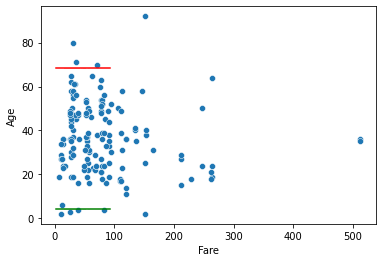

In [52]:
sns.scatterplot(x = titanicData['Fare'], y = titanicData['Age'])
sns.lineplot(x = titanicData['Age'], y = xl, color = 'green')
sns.lineplot(x = titanicData['Age'], y = xu, color = 'red')

In [53]:
titanicData['Age_sd'] = np.where(
    titanicData['Age']<xl,
    xl,
    np.where(
        titanicData['Age']>xu,
        xu,
        titanicData['Age']
    )
)

In [54]:
titanicData_sd = titanicData[(titanicData['Age']>=xl) & (titanicData['Age']<=xu)]
titanicData[['Age', 'Age_sd']].describe()

,Age,Age_sd
count,158.000000,158.000000
mean,36.265823,36.052802
std,16.024829,15.279515
min,2.000000,4.216166
25%,24.000000,24.000000
50%,36.000000,36.000000
75%,48.000000,48.000000
max,92.000000,68.315480


### Fare

In [55]:
xl = titanicData['Fare'].mean() - (titanicData['Fare'].std() * 1)
xu = titanicData['Fare'].mean() + (titanicData['Fare'].std() * 1)
print('Lower value:', xl)
print('Upper value:', xu)

Lower value: 2.873888314852948
Upper value: 156.87013943081178


<AxesSubplot:xlabel='Age', ylabel='Fare'>

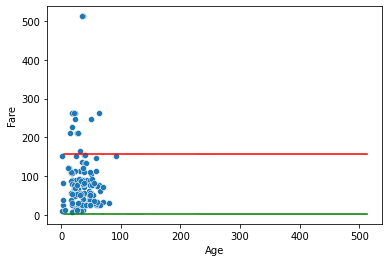

In [56]:
sns.scatterplot(x = titanicData['Age'], y = titanicData['Fare'])
sns.lineplot(x = titanicData['Fare'], y = xl, color = 'green')
sns.lineplot(x = titanicData['Fare'], y = xu, color = 'red')

In [57]:
titanicData['Fare_sd'] = np.where(
    titanicData['Fare']<xl,
    xl,
    np.where(
        titanicData['Fare']>xu,
        xu,
        titanicData['Fare']
    )
)

In [58]:
titanicData_sd = titanicData[(titanicData['Fare']>=xl) & (titanicData['Fare']<=xu)]
titanicData[['Fare', 'Fare_sd']].describe()

,Fare,Fare_sd
count,173.000000,173.000000
mean,79.872014,69.232595
std,76.998126,45.831253
min,5.000000,5.000000
25%,30.000000,30.000000
50%,57.000000,57.000000
75%,91.079200,91.079200
max,512.329200,156.870139


&nbsp; f. Eliminación de outliers: Percentile approach

No es posible hacer eliminación de outliers por percentile approach con las variables categóricas Sex, SibSp, Cabin, Embarked, Parch

### Age

In [59]:
pl = np.nanpercentile(titanicData['Age'], 5)
pu = np.nanpercentile(titanicData['Age'], 95)
print('Lower value:', pl)
print('Upper value:', pu)

Lower value: 14.85
Upper value: 62.150000000000006


<AxesSubplot:xlabel='Fare', ylabel='Age'>

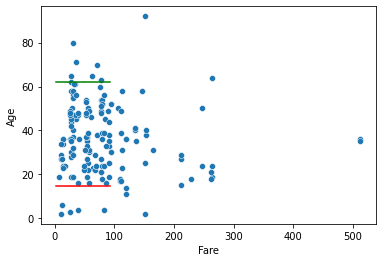

In [60]:
sns.scatterplot(x = titanicData['Fare'], y = titanicData['Age'])
sns.lineplot(x = titanicData['Age'], y = pl, color = 'red')
sns.lineplot(x = titanicData['Age'], y = pu, color = 'green')

In [61]:
titanicData['Age_pct'] = np.where(
    titanicData['Age']<pl,
    pl,
    np.where(
        titanicData['Age']>pu,
        pu,
        titanicData['Age']
    )
)

In [62]:
titanicData_sd = titanicData[(titanicData['Age']>=pl) & (titanicData['Age']<=pu)]
titanicData[['Age', 'Age_pct']].describe()

,Age,Age_pct
count,158.000000,158.000000
mean,36.265823,36.265823
std,16.024829,14.110572
min,2.000000,14.850000
25%,24.000000,24.000000
50%,36.000000,36.000000
75%,48.000000,48.000000
max,92.000000,62.150000


### Fare

In [63]:
pl = np.nanpercentile(titanicData['Fare'], 5)
pu = np.nanpercentile(titanicData['Fare'], 95)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

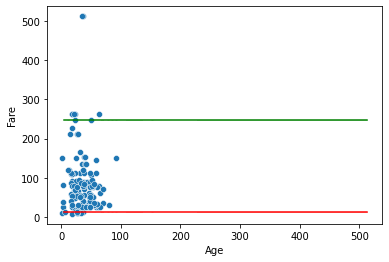

In [64]:
sns.scatterplot(x = titanicData['Age'], y = titanicData['Fare'])
sns.lineplot(x = titanicData['Fare'], y = pl, color = 'red')
sns.lineplot(x = titanicData['Fare'], y = pu, color = 'green')

In [65]:
titanicData['Fare_pct'] = np.where(
    titanicData['Fare']<pl,
    pl,
    np.where(
        titanicData['Fare']>pu,
        pu,
        titanicData['Fare']
    )
)

In [66]:
titanicData_sd = titanicData[(titanicData['Fare']>=pl) & (titanicData['Fare']<=pu)]
titanicData[['Fare', 'Fare_pct']].describe()

,Fare,Fare_pct
count,173.000000,173.000000
mean,79.872014,76.422002
std,76.998126,62.147038
min,5.000000,11.685000
25%,30.000000,30.000000
50%,57.000000,57.000000
75%,91.079200,91.079200
max,512.329200,247.520800


5\. Al comparar los métodos del inciso 4 contra “titanic.csv”, ¿Qué método (para cada
columna) se acerca más a la realidad y por qué? (20%)

In [67]:
titanicReal = pd.read_csv("titanic.csv")

### Sex

In [68]:
titanicReal = titanicReal.join(titanicData[['Sex_moda','Sex_sector']], on='PassengerId', how='outer')
titanicReal[['Sex', 'Sex_moda', 'Sex_sector']].describe()

,Sex,Sex_moda,Sex_sector
count,183,183,183
unique,2,2,2
top,male,male,female
freq,95,119,123


De los dos métodos, el más similar a la realidad es el de imputación por moda porque mantiene una frecuencia muy certera, así como su valor top

### Age

In [69]:
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Parch_sector,Fare_sector,Cabin_sector,Embarked_sector,age_LM,fare_LM,Age_sd,Fare_sd,Age_pct,Fare_pct
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,0,71.2833,B,S,38.0,71.2833,38.0,71.2833,38.0,71.2833
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,0,53.1000,A,S,35.0,53.1000,35.0,53.1000,35.0,53.1000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,0,51.8625,A,C,54.0,51.8625,54.0,51.8625,54.0,51.8625
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,0,16.7000,A,S,31.0,16.7000,NaN,16.7000,NaN,16.7000
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,0,26.5500,A,S,58.0,26.5500,58.0,26.5500,58.0,26.5500


In [70]:
titanicReal = titanicReal.join(titanicData[['Age_mean', 'Age_median','Age_moda', 'Age_sector', 'age_LM']], on='PassengerId', how='outer', rsuffix='_y')
titanicReal[['Age', 'Age_mean', 'Age_median','Age_moda', 'Age_sector', 'age_LM']].describe()

,Age,Age_mean,Age_median,Age_moda,Age_sector,age_LM
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,35.674426,36.265823,36.229508,34.590164,31.311475,35.546448
std,15.643866,14.883584,14.883866,15.471395,19.429394,14.993653
min,0.920000,2.000000,2.000000,2.000000,0.000000,2.000000
25%,24.000000,25.000000,25.000000,24.000000,19.000000,25.000000
50%,36.000000,36.265823,36.000000,32.000000,32.000000,32.000000
75%,47.500000,47.000000,47.000000,47.000000,47.000000,47.000000
max,80.000000,92.000000,92.000000,92.000000,92.000000,92.000000


De todos los métodos, el más similar a la realidad es el método de regresión lineal simple porque tiene un promedio muy cercano al real y su desviación estándar no se aleja demasiado, a pesar de tener un máximo muy diferente

### SibSp

In [71]:
titanicReal = titanicReal.join(titanicData[['SibSp_moda', 'SibSp_sector']], on='PassengerId', how='outer')
titanicReal[['SibSp', 'SibSp_moda']].describe()

,SibSp,SibSp_moda
count,183.000000,183.000000
mean,0.464481,0.453552
std,0.644159,0.643459
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,3.000000,3.000000


De los dos métodos, el más similar a la realidad es el de imputación por moda porque su promedio y desviación estándar se mantienen unidos a los datos reales

### Parch

In [72]:
titanicReal = titanicReal.join(titanicData[['Parch_moda', 'Parch_sector']], on='PassengerId', how='outer')
titanicReal[['Parch', 'Parch_moda', 'Parch_sector']].describe()

,Parch,Parch_moda
count,183.000000,183.000000
mean,0.475410,0.431694
std,0.754617,0.737147
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,4.000000,4.000000


De los dos métodos, el más similar a la realidad es el de imputación por moda porque su máximo, promedio y mínimo describen a los datos reales

### Fare

In [73]:
titanicReal = titanicReal.join(titanicData[['Fare_mean', 'Fare_median','Fare_moda', 'Fare_sector', 'fare_LM']], on='PassengerId', how='outer')
titanicReal[['Fare', 'Fare_mean', 'Fare_median','Fare_moda', 'Fare_sector', 'fare_LM']].describe()

,Fare,Fare_mean,Fare_median,Fare_moda,Fare_sector,fare_LM
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,78.682469,79.872014,78.622177,76.958243,75.507423,79.605784
std,76.347843,74.852909,75.034197,75.832995,77.034588,74.861144
min,0.000000,5.000000,5.000000,5.000000,0.000000,5.000000
25%,29.700000,30.000000,30.000000,26.550000,26.550000,30.000000
50%,57.000000,63.358300,57.000000,55.441700,55.441700,63.358300
75%,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
max,512.329200,512.329200,512.329200,512.329200,512.329200,512.329200


De todos los métodos, el más similar a la realidad es el de imputación por mediana porque su mediana está bastante ligada a la real, el mínimo y máximo son certeros y su desviación estándar no se aleja tanto como otros métodos

### Cabin

In [74]:
titanicReal = titanicReal.join(titanicData[['Cabin_moda', 'Cabin_sector']], on='PassengerId', how='outer')
titanicReal[['Cabin', 'Cabin_moda', 'Cabin_sector']].describe()

,Cabin,Cabin_moda,Cabin_sector
count,183,183,173
unique,133,122,6
top,G6,G6,A
freq,4,27,94


De los dos métodos, el más similar a la realidad es el de imputación por moda porque sus valores únicos se asemejan más a los datos reales

### Embarked

In [75]:
titanicReal = titanicReal.join(titanicData[['Embarked_moda', 'Embarked_sector']], on='PassengerId', how='outer')
titanicReal[['Embarked', 'Embarked_moda', 'Embarked_sector']].describe()

,Embarked,Embarked_moda,Embarked_sector
count,183,183,183
unique,3,3,2
top,S,S,S
freq,116,122,123


De los dos métodos, el más similar a la realidad es el de imputación por moda porque a pesar de tener gran representividad con imputación sectorizada, se tiene mejor índice de valores únicos y frecuencia

6\. Conclusiones (10%)

* Existen muchísimos métodos para contemplar variables faltantes antes que borrar registros completos
* Los métodos que se utilizan para manejar valores faltantes dependen mucho de si la variable es categórica o numérica
* La imputación por media, mediana y moda ayuda muchísimo a no desviar las estadísticas generales de los datos
* Los métodos predictivos dan bastante representatividad y certeza en los datos
* El metodo menos certero es el de imputación por sectorización

### Parte 2: (30%)
Utilizando la misma tabla de “titanic_MD.csv” en R o en Python realice lo siguiente:

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

titanicData2 = titanicData.copy().drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 
                                        'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Age_median', 
                                        'Age_moda', 'Fare_mean', 'Fare_moda', 'Sex_sector', 'Age_sector', 
                                        'SibSp_sector', 'Parch_sector', 'Fare_sector', 'Cabin_sector', 
                                        'Embarked_sector', 'Embarked_moda', 'SibSp_moda', 'Cabin_moda', 
                                        'Sex_moda', 'Parch_moda', 'fare_LM', 'Age_sd','Fare_sd', 
                                        'Age_pct', 'Fare_pct'], axis=1)

titanicData2.rename(columns={'Fare_median' : 'Fare', 'age_LM' : 'Age'}, inplace=True)

1\. Luego del pre-procesamiento de la data con Missing Values, normalice las columnas
numéricas por los métodos: (50%)


&nbsp; a. Standarization

In [77]:
scaler = StandardScaler()
titanicData_z = titanicData2.copy()
for col in titanicData_z.select_dtypes(include=['float64', 'int64']).columns:
    titanicData_z[col+'_z'] = scaler.fit_transform(titanicData_z[[col]])

titanicData_z.head()

,PassengerId,Survived,Fare,Age,PassengerId_z,Survived_z,Fare_z,Age_z
0,2,1,71.2833,38.0,-1.840135,0.698430,-0.098075,0.164088
1,4,1,53.1000,35.0,-1.832017,0.698430,-0.341074,-0.036545
2,7,0,51.8625,54.0,-1.819841,-1.431782,-0.357612,1.234134
3,11,1,16.7000,31.0,-1.803606,0.698430,-0.827517,-0.304057
4,12,1,26.5500,58.0,-1.799547,0.698430,-0.695883,1.501646


In [78]:
titanicData_z.describe()

,PassengerId,Survived,Fare,Age,PassengerId_z,Survived_z,Fare_z,Age_z
count,183.000000,183.000000,183.000000,183.000000,183.000000,1.830000e+02,1.830000e+02,1.830000e+02
mean,455.366120,0.672131,78.622177,35.546448,0.000000,4.853434e-17,-1.043488e-16,1.492431e-16
std,247.052476,0.470725,75.034197,14.993653,1.002743,1.002743e+00,1.002743e+00,1.002743e+00
min,2.000000,0.000000,5.000000,2.000000,-1.840135,-1.431782e+00,-9.838735e-01,-2.243515e+00
25%,263.500000,0.000000,30.000000,25.000000,-0.778752,-1.431782e+00,-6.497780e-01,-7.053239e-01
50%,457.000000,1.000000,57.000000,32.000000,0.006632,6.984303e-01,-2.889549e-01,-2.371789e-01
75%,676.000000,1.000000,90.000000,47.000000,0.895515,6.984303e-01,1.520512e-01,7.659891e-01
max,890.000000,1.000000,512.329200,92.000000,1.764104,6.984303e-01,5.795983e+00,3.775493e+00


&nbsp; b. MinMaxScaling

In [79]:
scaler = MinMaxScaler()
titanicData_norm = titanicData2.copy()
for col in titanicData_norm.select_dtypes(include=['float64', 'int64']).columns:
    titanicData_norm[col+'_norm'] = scaler.fit_transform(titanicData_norm[[col]])

titanicData_norm.head()

,PassengerId,Survived,Fare,Age,PassengerId_norm,Survived_norm,Fare_norm,Age_norm
0,2,1,71.2833,38.0,0.000000,1.0,0.130651,0.400000
1,4,1,53.1000,35.0,0.002252,1.0,0.094810,0.366667
2,7,0,51.8625,54.0,0.005631,0.0,0.092371,0.577778
3,11,1,16.7000,31.0,0.010135,1.0,0.023062,0.322222
4,12,1,26.5500,58.0,0.011261,1.0,0.042477,0.622222


In [80]:
titanicData_norm.describe()

,PassengerId,Survived,Fare,Age,PassengerId_norm,Survived_norm,Fare_norm,Age_norm
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,78.622177,35.546448,0.510547,0.672131,0.145117,0.372738
std,247.052476,0.470725,75.034197,14.993653,0.278212,0.470725,0.147900,0.166596
min,2.000000,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,30.000000,25.000000,0.294482,0.000000,0.049278,0.255556
50%,457.000000,1.000000,57.000000,32.000000,0.512387,1.000000,0.102498,0.333333
75%,676.000000,1.000000,90.000000,47.000000,0.759009,1.000000,0.167544,0.500000
max,890.000000,1.000000,512.329200,92.000000,1.000000,1.000000,1.000000,1.000000


&nbsp; c. MaxAbsScaler


In [81]:
scaler = MaxAbsScaler()
titanicData_max = titanicData2.copy()
for col in titanicData_max.select_dtypes(include=['float64', 'int64']).columns:
    titanicData_max[col+'_max'] = scaler.fit_transform(titanicData_max[[col]])

titanicData_max.head()

,PassengerId,Survived,Fare,Age,PassengerId_max,Survived_max,Fare_max,Age_max
0,2,1,71.2833,38.0,0.002247,1.0,0.139136,0.413043
1,4,1,53.1000,35.0,0.004494,1.0,0.103644,0.380435
2,7,0,51.8625,54.0,0.007865,0.0,0.101229,0.586957
3,11,1,16.7000,31.0,0.012360,1.0,0.032596,0.336957
4,12,1,26.5500,58.0,0.013483,1.0,0.051822,0.630435


In [82]:
titanicData_max.describe()

,PassengerId,Survived,Fare,Age,PassengerId_max,Survived_max,Fare_max,Age_max
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,78.622177,35.546448,0.511647,0.672131,0.153460,0.386374
std,247.052476,0.470725,75.034197,14.993653,0.277587,0.470725,0.146457,0.162974
min,2.000000,0.000000,5.000000,2.000000,0.002247,0.000000,0.009759,0.021739
25%,263.500000,0.000000,30.000000,25.000000,0.296067,0.000000,0.058556,0.271739
50%,457.000000,1.000000,57.000000,32.000000,0.513483,1.000000,0.111257,0.347826
75%,676.000000,1.000000,90.000000,47.000000,0.759551,1.000000,0.175668,0.510870
max,890.000000,1.000000,512.329200,92.000000,1.000000,1.000000,1.000000,1.000000


2\. Compare los estadísticos que considere más importantes para su conclusión y compare
contra la data completa de “titanic.csv” (deberán de normalizar también). (50%)

In [83]:
titanicReal = pd.read_csv("titanic.csv")
scaler = StandardScaler()
titanicReal2 = titanicData2.copy()
for col in titanicReal2.select_dtypes(include=['float64', 'int64']).columns:
    titanicReal2[col+'_zz'] = scaler.fit_transform(titanicReal2[[col]])

titanicReal2.head()

,PassengerId,Survived,Fare,Age,PassengerId_zz,Survived_zz,Fare_zz,Age_zz
0,2,1,71.2833,38.0,-1.840135,0.698430,-0.098075,0.164088
1,4,1,53.1000,35.0,-1.832017,0.698430,-0.341074,-0.036545
2,7,0,51.8625,54.0,-1.819841,-1.431782,-0.357612,1.234134
3,11,1,16.7000,31.0,-1.803606,0.698430,-0.827517,-0.304057
4,12,1,26.5500,58.0,-1.799547,0.698430,-0.695883,1.501646


### Age

Real distribution of age


<AxesSubplot:xlabel='Age_zz', ylabel='Density'>

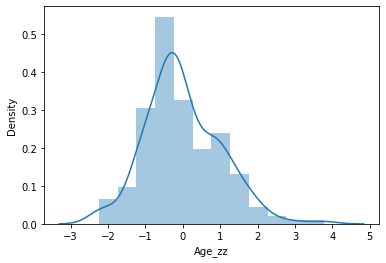

In [84]:
print("Real distribution of age")
sns.distplot(titanicReal2['Age_zz'])

Preprocessed Age


<AxesSubplot:xlabel='Age_z', ylabel='Density'>

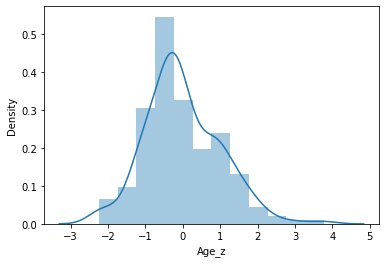

In [85]:
print('Preprocessed Age')
sns.distplot(titanicData_z['Age_z'])

El procesamiento de la variable **Age** se mantuvo fiel en términos gráficos con los datos reales

### Fare

Real distribution of fare


<AxesSubplot:xlabel='Fare_zz', ylabel='Density'>

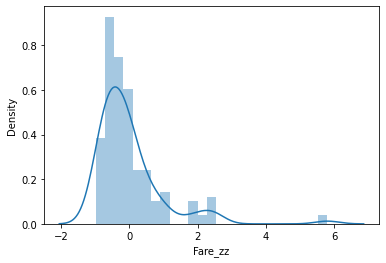

In [86]:
print("Real distribution of fare")
sns.distplot(titanicReal2['Fare_zz'])

Preprocessed Fare


<AxesSubplot:xlabel='Fare_z', ylabel='Density'>

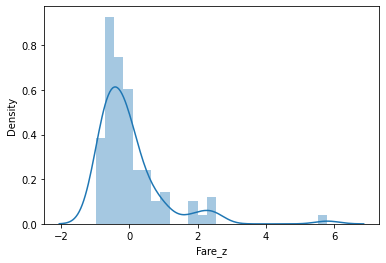

In [87]:
print('Preprocessed Fare')
sns.distplot(titanicData_z['Fare_z'])

El procesamiento de la variable **Fare** se mantuvo fiel en términos gráficos con los datos reales

In [88]:
titanicData3 = titanicReal2.drop(['Survived'], axis=1).join(titanicData_z[['Age_z', 'Fare_z']], on='PassengerId', how='outer', rsuffix='_y').drop(['PassengerId'], axis=1)
titanicData3.describe()

,Fare,Age,PassengerId_zz,Survived_zz,Fare_zz,Age_zz,Age_z,Fare_z
count,183.000000,183.000000,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02
mean,78.622177,35.546448,3.882747e-17,5.824121e-17,-1.164824e-16,1.638034e-16,1.456030e-16,-1.164824e-16
std,75.034197,14.993653,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00
min,5.000000,2.000000,-1.840135e+00,-1.431782e+00,-9.838735e-01,-2.243515e+00,-2.243515e+00,-9.838735e-01
25%,30.000000,25.000000,-7.787516e-01,-1.431782e+00,-6.497780e-01,-7.053239e-01,-7.053239e-01,-6.497780e-01
50%,57.000000,32.000000,6.631637e-03,6.984303e-01,-2.889549e-01,-2.371789e-01,-2.371789e-01,-2.889549e-01
75%,90.000000,47.000000,8.955150e-01,6.984303e-01,1.520512e-01,7.659891e-01,7.659891e-01,1.520512e-01
max,512.329200,92.000000,1.764104e+00,6.984303e-01,5.795983e+00,3.775493e+00,3.775493e+00,5.795983e+00


El modelo preprocesado se mantuvo fiel a los datos reales en términos generales; el promedio de **Age** difiere ligeramente